In [1]:
import numpy as np
import scipy.special as sc_special
import tensorflow as tf 
from 	tensorflow import keras
import pandas as pd
from tensorflow.keras import optimizers,metrics,layers,Sequential
import seaborn as sns
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data  = pd.read_csv('Data_diff.csv',sep = ',',header=0)
#data = data.sample(frac = 1) #打乱数据
data.head()

,aqi,pre_aqi,so2,no2,co,o3,pm10,pm2_5,temp_diff,humi_diff,w_dir_diff,wind_diff,rain_diff
0,48,46,12,27,0.7,26,42,33,0,1,0,0,0.0
1,53,48,16,26,0.7,29,52,37,1,-1,0,0,0.1
2,52,53,17,17,0.6,42,53,36,0,-1,0,0,-0.1
3,49,52,15,13,0.6,52,49,34,0,0,0,0,0.0
4,45,49,16,14,0.6,58,45,30,0,1,0,0,0.0


In [14]:
len(data)

8458

In [22]:
H = [5,6,7,8,9,10,11,12,13,14]
inputnum = 12
hiddennum = H[6]
outputnum = 1
X = data.iloc[:8407,1:]
Y = data.iloc[:8407,0]
TestX = data.iloc[8408:,1:]
TestY = data.iloc[8408:,0]
TestX.head()

,pre_aqi,so2,no2,co,o3,pm10,pm2_5,temp_diff,humi_diff,w_dir_diff,wind_diff,rain_diff
8408,87,15,31,1.2,5,76,60,-1,0,180,1,0.0
8409,82,14,33,1.2,6,71,53,0,-1,-225,1,0.0
8410,73,16,33,1.2,8,53,38,0,-3,0,-1,0.0
8411,54,15,29,1.1,13,41,27,-1,-1,0,0,0.0
8412,41,13,24,1.0,24,33,23,0,4,225,0,0.0


In [23]:

# O3max = np.max(np.abs(O3Y),axis=0)
# O3mean = np.mean(O3Y,axis=0)

def data_progress(X,TestX):
    for i in range(0,X.shape[1]):
        TestX.iloc[:,i] -= np.mean(X,axis=0)[i]
        TestX.iloc[:,i] /= np.max(np.abs(X),axis=0)[i]
        X.iloc[:,i] -= np.mean(X,axis=0)[i]
        X.iloc[:,i] /= np.max(np.abs(X),axis=0)[i]

        
    return 0
def data_progressY(Y,TestY):
    Y -= np.mean(Y,axis=0)
    Y /= np.max(np.abs(Y),axis=0)
    TestY -= np.mean(Y,axis=0)
    TestY /= np.max(np.abs(Y),axis=0)
    return 1
data_progress(X,TestX)


0

# 搭建神经网络

In [12]:
model = keras.Sequential([
    keras.layers.Dense(hiddennum,name='layer1',activation='relu'),
    keras.layers.Dense(outputnum,name='layer2')
    ])


model.build(input_shape=[None,inputnum])
#model.summary()
model.compile(optimizer=optimizers.Adam(lr=0.005),
            loss='mse',)
    
model.fit(X,Y,epochs=100)  #！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！！

Epoch 1/100
261/261 [==============================] - 1s 1ms/step - loss: 1771.2854
Epoch 2/100
261/261 [==============================] - 0s 1ms/step - loss: 298.2652
Epoch 3/100
261/261 [==============================] - 0s 1ms/step - loss: 17.9792
Epoch 4/100
261/261 [==============================] - 0s 1ms/step - loss: 12.2667
Epoch 5/100
261/261 [==============================] - 0s 2ms/step - loss: 9.7761
Epoch 6/100
261/261 [==============================] - ETA: 0s - loss: 8.242 - 0s 1ms/step - loss: 8.2477
Epoch 7/100
261/261 [==============================] - 0s 1ms/step - loss: 7.9417
Epoch 8/100
261/261 [==============================] - 0s 980us/step - loss: 7.5267
Epoch 9/100
261/261 [==============================] - 0s 738us/step - loss: 7.0637
Epoch 10/100
261/261 [==============================] - 0s 807us/step - loss: 7.4190
Epoch 11/100
261/261 [==============================] - 0s 2ms/step - loss: 7.3755
Epoch 12/100
261/261 [==============================] - 0s 

261/261 [==============================] - 0s 826us/step - loss: 5.9152
Epoch 98/100
261/261 [==============================] - 0s 780us/step - loss: 5.8421
Epoch 99/100
261/261 [==============================] - 0s 772us/step - loss: 5.6388
Epoch 100/100
261/261 [==============================] - 0s 866us/step - loss: 5.6149


In [24]:
model.evaluate(TestX,TestY)

2/2 [==============================] - 0s 3ms/step - loss: 16.7892


16.789175033569336

In [25]:
result = np.squeeze(model.predict(TestX))

In [26]:
df = pd.DataFrame({'predictive-value':result, 'true-value':TestY.values})


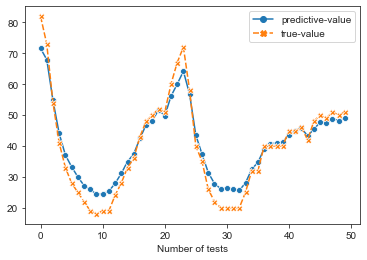

In [27]:
sns.set_style('ticks')   #默认五种风格：darkgrid，whitegrid，dark，white，ticks
#sns.set(font='SimHei')#, font_scale=0.8)        # 解决Seaborn中文显示问题

fig=sns.lineplot(data=df,markers=True)
plt.xlabel("Number of tests")
#plt.ylabel("test value")
scatter_fig = fig.get_figure()
scatter_fig.savefig('./pic/BP-Predict', dpi = 400)